In [1]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [189]:
def kernel(point, xmat, tau):
    m,n = np.shape(xmat)
    weights = np.mat(np.eye((m)))#initialize as a diagnal matrx
    
    for j in range(m):
        diff = point - xmat[j]
        weights[j, j] = np.exp(diff.T* diff / (-2.0 * tau**2))
    
    return weights

def localWeight(point, xmat, ymat, tau):
    weight = kernel(point, xmat, tau)
    theta = (xmat.T * (weight*xmat)).I * (xmat.T * weight * ymat)
    return theta

def localWeightRegression(point,xmat, ymat, tau):
    ypred= localWeight(point, xmat, ymat, tau).T*point    
    return ypred

## Cube of X

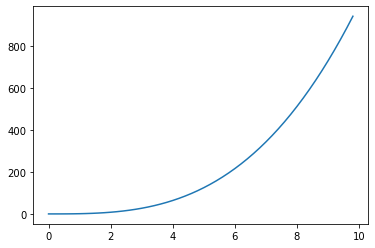

In [212]:
Y=[];X=np.arange(0,10,0.2)
for x in X:
    Y.append(x**3)
plt.plot(X,Y)

score 0.8364104288928873


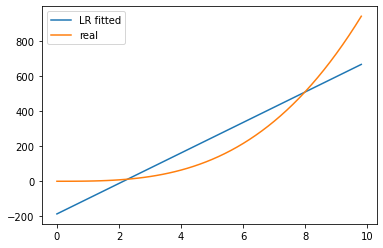

In [213]:
X=X.reshape(-1,1)
reg = LinearRegression().fit(X,Y)
print('score',reg.score(X, Y))
plt.plot(X,X*reg.coef_+reg.intercept_,label='LR fitted')
plt.plot(X,Y,label='real')
plt.legend()

score 1.0


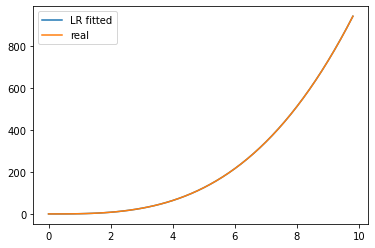

In [214]:
#X_
X_=X**3
reg_ = LinearRegression().fit(X_,Y)
print('score',reg_.score(X_, Y))
plt.plot(X,X_*reg_.coef_+reg_.intercept_,label='LR fitted')
plt.plot(X,Y,label='real')
plt.legend()

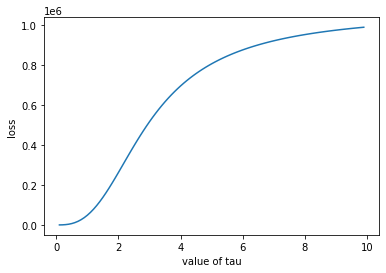

In [216]:
xmat=X.reshape(50,1);ymat=np.array(Y).reshape(50,1)
value=[]
for tau in np.arange(0.1,10,0.1):
    Y_pred=[]
    for x in X:
        Y_pred.append(localWeightRegression(x,xmat,ymat,tau)[0,0])
    value.append(sum([(x1 - x2)**2 for (x1, x2) in zip(Y, Y_pred)]))
plt.xlabel('value of tau')
plt.ylabel('loss')
plt.plot(np.arange(0.1,10,0.1),value)

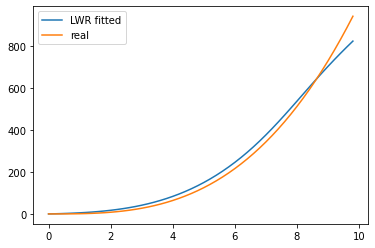

In [218]:
Y_pred=[];tau=1
for x in X:
    Y_pred.append(localWeightRegression(x,xmat,ymat,tau)[0,0])    
plt.plot(X,Y_pred,label='LWR fitted')
plt.plot(X,Y,label='real')
plt.legend()

In [219]:
X_new=np.array([5.1]).reshape(-1,1)
print('real:',round((5.1)**3,4))
print('LR_pred:',round(reg.predict(np.array(X_new))[0],4))
print('LR_cube_pred:',round(reg_.predict(np.array(X_new)**3)[0],4))
print('LWR_pred:',round(localWeightRegression(X_new,xmat,ymat,tau)[0,0],4))

real: 132.651
LR_pred: 257.5032
LR_cube_pred: 132.651
LWR_pred: 157.7723


## Square root of X

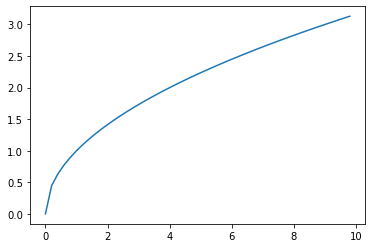

In [220]:
Y=[];X=np.arange(0,10,0.2)
for x in X:
    Y.append(math.sqrt(x))
plt.plot(X,Y)

score 0.9478052626551686


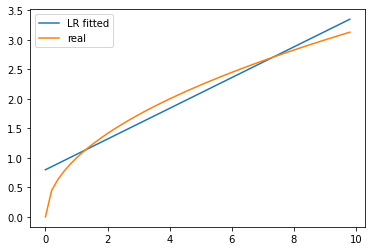

In [221]:
X=X.reshape(-1,1)
reg = LinearRegression().fit(X,Y)
print('score',reg.score(X, Y))
plt.plot(X,X*reg.coef_+reg.intercept_,label='LR fitted')
plt.plot(X,Y,label='real')
plt.legend()

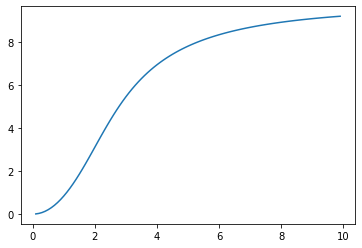

In [222]:
xmat=X.reshape(50,1);ymat=np.array(Y).reshape(50,1)
value=[]
for tau in np.arange(0.1,10,0.1):
    Y_pred=[]
    for x in X:
        Y_pred.append(localWeightRegression(x,xmat,ymat,tau)[0,0])
    value.append(sum([(x1 - x2)**2 for (x1, x2) in zip(Y, Y_pred)]))
plt.plot(np.arange(0.1,10,0.1),value)

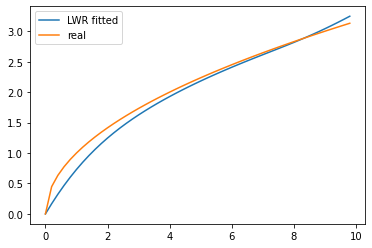

In [224]:
Y_pred=[];tau=1
for x in X:
    Y_pred.append(localWeightRegression(x,xmat,ymat,tau)[0,0])    
plt.plot(X,Y_pred,label='LWR fitted')
plt.plot(X,Y,label='real')
plt.legend()

In [200]:
X_new=np.array([5.1]).reshape(-1,1)
print('real:',round(math.sqrt(5.1),4))
print('LR_pred:',round(reg.predict(np.array(X_new))[0],4))
print('LWR_pred:',round(localWeightRegression(X_new,xmat,ymat,tau)[0,0],4))

real: 2.2583
LR_pred: 2.1268
LWR_pred: 2.2063


## Sinx

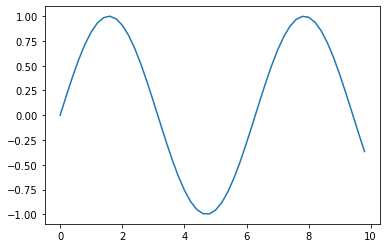

In [206]:
Y=[];X=np.arange(0,10,0.2)
random.seed(2)
for x in X:
    #X_=random.randint(0,100)
    func=math.sin(x)
    Y.append(func)
plt.plot(X,Y)


score 0.0021522180130465474


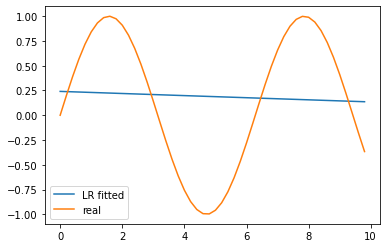

In [207]:
X=X.reshape(-1,1)
reg = LinearRegression().fit(X,Y)
print('score',reg.score(X, Y))
plt.plot(X,X*reg.coef_+reg.intercept_,label='LR fitted')
plt.plot(X,Y,label='real')
plt.legend()

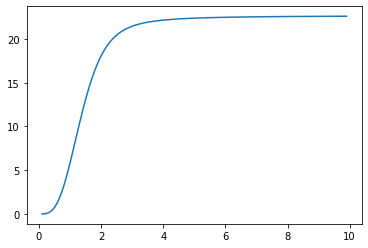

In [208]:
xmat=X.reshape(50,1);ymat=np.array(Y).reshape(50,1)
value=[]
for tau in np.arange(0.1,10,0.1):
    Y_pred=[]
    for x in X:
        Y_pred.append(localWeightRegression(x,xmat,ymat,tau)[0,0])
    value.append(sum([(x1 - x2)**2 for (x1, x2) in zip(Y, Y_pred)]))
plt.plot(np.arange(0.1,10,0.1),value)

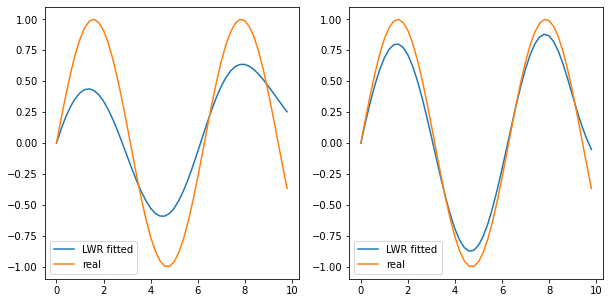

In [209]:
fig, axes = plt.subplots(1, 2,figsize=(10,5))
Y_pred=[];tau=1
for x in X:
    Y_pred.append(localWeightRegression(x,xmat,ymat,tau)[0,0])    
axes[0].plot(X,Y_pred,label='LWR fitted')
axes[0].plot(X,Y,label='real')
axes[0].legend()

Y_pred=[];tau=0.5
for x in X:
    Y_pred.append(localWeightRegression(x,xmat,ymat,tau)[0,0])    
axes[1].plot(X,Y_pred,label='LWR fitted')
axes[1].plot(X,Y,label='real')
axes[1].legend()

In [210]:
X_new=np.array([5.1]).reshape(-1,1)
print('real:',round(math.sin(5.1),4))
print('LR_pred:',round(reg.predict(np.array(X_new))[0],4))
print('LWR_pred:',round(localWeightRegression(X_new,xmat,ymat,tau)[0,0],4))

real: -0.9258
LR_pred: 0.1866
LWR_pred: -0.7931
